# **EXPLORING DATA**

In [ ]:
#importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import glob
from glob import glob
from pathlib import Path
from sklearn import *
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#accessing images
data = glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/*.jpg', recursive=True)
print('No. of Images in the directory ', len(data))

No. of Images in the directory  6400


In [ ]:
#exploring number of data in each directory
#train
data_MildDemented_train = glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/train/MildDemented/*.jpg', recursive=True)
data_ModerateDemented_train = glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/train/ModerateDemented/*.jpg', recursive=True)
data_NonDemented_train = glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/train/NonDemented/*.jpg', recursive=True)
data_VeryMildDemented_train = glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/train/VeryMildDemented/*.jpg', recursive=True)
#test
data_MildDemented_test= glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/test/MildDemented/*.jpg', recursive=True)
data_ModerateDemented_test = glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/test/ModerateDemented/*.jpg', recursive=True)
data_NonDemented_test = glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/test/NonDemented/*.jpg', recursive=True)
data_VeryMildDemented_test = glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/test/VeryMildDemented/*.jpg', recursive=True)

print('No. of files in the directory Mild Demented:', len(data_MildDemented_train)+len(data_MildDemented_test))
print('No. of files in the directory Moderate Demented:', len(data_ModerateDemented_train)+len(data_ModerateDemented_test))
print('No. of files in the directory Non Demented:', len(data_NonDemented_train)+len(data_NonDemented_test))
print('No. of files in the directory Very Mild Demented:', len(data_VeryMildDemented_train)+len(data_VeryMildDemented_test))

No. of files in the directory Mild Demented: 896
No. of files in the directory Moderate Demented: 64
No. of files in the directory Non Demented: 3200
No. of files in the directory Very Mild Demented: 2240


In [ ]:
#DATASET CREATION
dataset_path = Path('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset')
images_link = list(dataset_path.glob(r'**/*.jpg'))
images_l = [x.parents[0].stem for x in images_link] #extracts the labels from the image file paths using list comprehension
images_folder=[x.parents[1].stem for x in images_link] # extracts the folder information (TRAIN/TEST) from the image file paths. 
images_labels=preprocessing.LabelEncoder().fit_transform(images_l) #(label encoding) function is used to convert the string labels into integer labels.
df=pd.DataFrame()
df['Link']=images_link
df['label']=images_l
df['TRAIN/TEST']=images_folder
df['Label_Int']=images_labels

In [ ]:
df

Link         label  \
0     /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   
1     /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   
2     /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   
3     /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   
4     /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   
...                                                 ...           ...   
6395  /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   
6396  /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   
6397  /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   
6398  /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   
6399  /content/drive/MyDrive/archive (1)/Alzheimer_s...  MildDemented   

     TRAIN/TEST  Label_Int  
0         train          0  
1         train          0  
2         train          0  
3         train          0  
4         train          0  
...         ...        ...  
6395       test          0  
6396       test          0  
6397       test          0  
6398       test          0  
6399       test          0  

[6400 rows x 4 columns]

In [1]:
df_MildDemented = df[df['label'] == 'MildDemented']
df_MildDemented_link = df_MildDemented['Link']

NameError: name 'df' is not defined

In [ ]:
df_ModerateDemented = df[df['label'] == 'ModerateDemented']
df_ModerateDemented_link = df_ModerateDemented['Link']

In [ ]:
df_NonDemented = df[df['label'] == 'NonDemented']
df_NonDemented_link = df_NonDemented['Link']

In [ ]:
df_VeryMildDemented = df[df['label'] == 'VeryMildDemented']
df_VeryMildDemented_link = df_VeryMildDemented['Link']

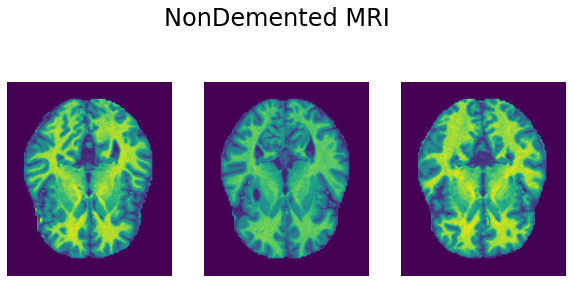

In [ ]:
#Visualizing Data
#NonDemented
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('NonDemented MRI', fontsize=24)

for ind, img_src in enumerate(df_NonDemented_link[:3]):
    plt.subplot(1, 3, ind+1) # figure will have 1 row and 3 columns, and ind+1 specifies which subplot position to use.
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

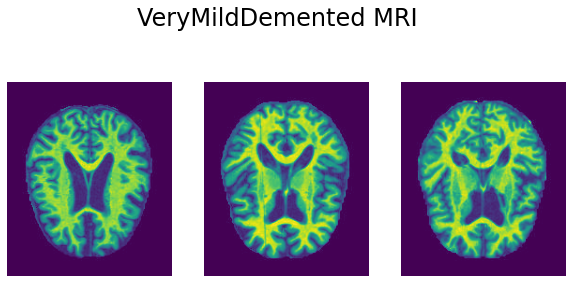

In [ ]:
#VeryMildDemented
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('VeryMildDemented MRI', fontsize=24)

for ind, img_src in enumerate(df_VeryMildDemented_link[:3]):
    plt.subplot(1, 3, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

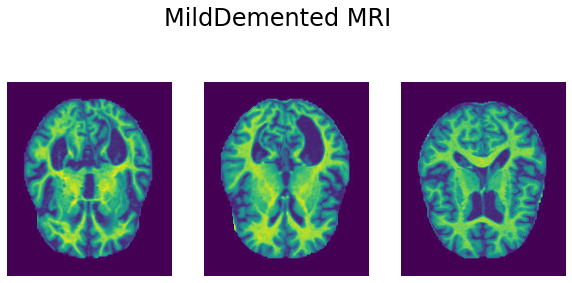

In [ ]:
#MildDemented
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('MildDemented MRI', fontsize=24)

for ind, img_src in enumerate(df_MildDemented_link[1:4]):
    plt.subplot(1, 3, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

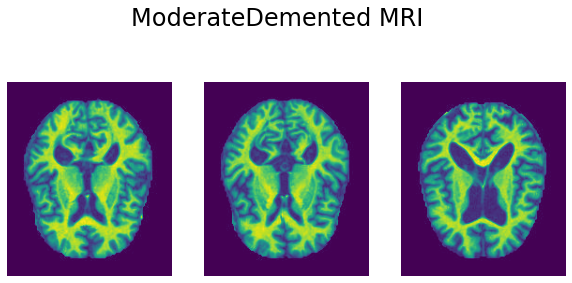

In [ ]:
#MildDemented
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('ModerateDemented MRI', fontsize=24)

for ind, img_src in enumerate(df_ModerateDemented_link[:3]):
    plt.subplot(1, 3, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

# **PREPROCESSING**
**APPLYING FILTERS**

Text(0.5, 1.0, 'MEDIAN FILTER')

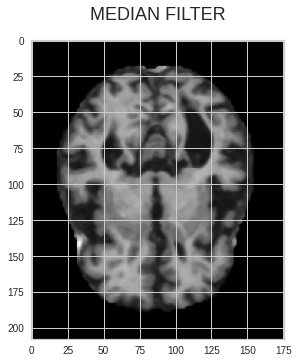

In [ ]:
#MEDIAN FILTER
from PIL import Image, ImageFilter

image = Image.open(r"/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")
image_Median = image.filter(ImageFilter.MedianFilter(size = 3))
plt.imshow(image_Median,cmap='gray')
plt.title("MEDIAN FILTER",fontsize=18,pad=20)

In [ ]:
image_Median.save("/content/drive/MyDrive/AD/FilterImages/Medianfilter.jpg")

In [ ]:
original = cv2.imread("/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")
MedianFilter = cv2.imread("/content/drive/MyDrive/AD/FilterImages/Medianfilter.jpg", 1)

def mse(imageA, imageB):
     #"""the average difference between two images pixel by pixel.
       #The lower the MSE, the more similar the images are."""
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return err

def psnr(img1, img2):
    """PSNR measures image quality after processing. Higher PSNR values indicate better quality. 
    It's like measuring how much the processed image has changed from the original."""
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

MSE_score = mse(original, MedianFilter)
RMSE_score = math.sqrt(MSE_score)
PSNR_score = psnr(original, MedianFilter)
print("MSE Score: " ,MSE_score) #MSE is like measuring the average difference between two photos
print("RMSE Score: " ,RMSE_score) #RMSE is like getting that difference in the same units as the original values
print("PSNR Score: " ,PSNR_score) #PSNR is like rating the quality of a compressed image compared to the original

MSE Score:  42.50349650349651
RMSE Score:  6.519470569263773
PSNR Score:  38.45545475468536


Text(0.5, 1.0, 'GAUSSIAN FILTER')

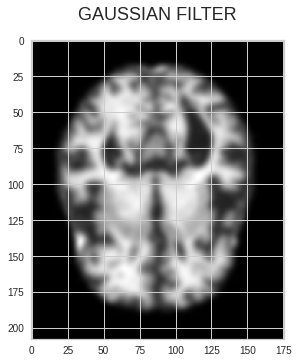

In [ ]:
#GAUSSIAN
image_Gaussian = image.filter(ImageFilter.GaussianBlur)
plt.imshow(image_Gaussian,cmap='gray')
plt.title("GAUSSIAN FILTER",fontsize=18,pad=20)

In [ ]:
image_Gaussian.save("/content/drive/MyDrive/AD/FilterImages/Gaussianfilter.jpg")

In [ ]:
original = cv2.imread("/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")
GaussianFilter = cv2.imread("/content/drive/MyDrive/AD/FilterImages/Gaussianfilter.jpg", 1)

def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return err

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

MSE_score = mse(original, GaussianFilter)
RMSE_score = math.sqrt(MSE_score)
PSNR_score = psnr(original, GaussianFilter)
print("MSE Score: " ,MSE_score)
print("RMSE Score: " ,RMSE_score)
print("PSNR Score: " ,PSNR_score)

MSE Score:  354.51185533216784
RMSE Score:  18.828485210769554
PSNR Score:  32.067592564930564


Text(0.5, 1.0, 'SHARPEN FILTER')

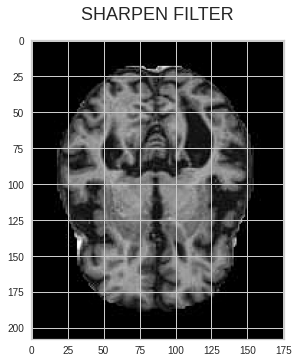

In [ ]:
#SHARPEN FILTER
image_Sharpen = image.filter(ImageFilter.SHARPEN);

plt.imshow(image_Sharpen,cmap='gray')
plt.title("SHARPEN FILTER",fontsize=18,pad=20)

In [ ]:
image_Sharpen.save("/content/drive/MyDrive/AD/FilterImages/Sharpenfilter.jpg")

In [ ]:
original = cv2.imread("/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")
SharpenFilter = cv2.imread("/content/drive/MyDrive/AD/FilterImages/Sharpenfilter.jpg", 1)

def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return err

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

MSE_score = mse(original, SharpenFilter)
RMSE_score = math.sqrt(MSE_score)
PSNR_score = psnr(original, SharpenFilter)
print("MSE Score: " ,MSE_score)
print("RMSE Score: " ,RMSE_score)
print("PSNR Score: " ,PSNR_score)

MSE Score:  83.04242242132867
RMSE Score:  9.112761514564543
PSNR Score:  35.742528012788384


Text(0.5, 1.0, 'EMBOSS FILTER')

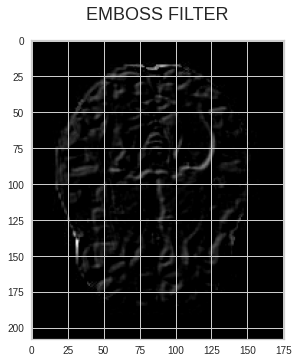

In [ ]:
#EMBOSS
image1 = cv2.imread("/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")
emboss_kernel = np.array([[-1, 0, 0],
                    [0, 0, 0],
                    [0, 0, 1]])
emboss_img = cv2.filter2D(image1, ddepth=-1, kernel=emboss_kernel)
plt.imshow(emboss_img,cmap='gray')
plt.title("EMBOSS FILTER",fontsize=18,pad=20)

In [ ]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return err

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

MSE_score = mse(image1, emboss_img)
RMSE_score = math.sqrt(MSE_score)
PSNR_score = psnr(image1, emboss_img)
print("MSE Score: " ,MSE_score)
print("RMSE Score: " ,RMSE_score)
print("PSNR Score: " ,PSNR_score)

MSE Score:  13237.293241914336
RMSE Score:  115.05343646286423
PSNR Score:  30.71854659914702


# **CNN WITHOUT PREPROCESSING**

In [ ]:
import shutil
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np
import pandas as pd
import os
from os import listdir
import keras
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
%matplotlib inline
import glob
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
import keras.utils as image

In [ ]:
MildDemented=glob.glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/MildDemented/*.jpg', recursive=True)
ModerateDemented=glob.glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/ModerateDemented/*.jpg', recursive=True)
NonDemented=glob.glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/NonDemented/*.jpg', recursive=True)
VeryMildDemented=glob.glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/VeryMildDemented/*.jpg', recursive=True)

In [ ]:
Imagedata = pd.DataFrame(index=np.arange(0, len(MildDemented)+len(ModerateDemented)+len(NonDemented)+len(VeryMildDemented)), columns=["image", "target"])
k=0
for c in [0,1,2,3]:
        if c==0:
            for m in range(len(MildDemented)):
                Imagedata.iloc[k]["image"] = MildDemented[m]
                Imagedata.iloc[k]["target"] = 0
                k += 1
        elif c==1:
            for m in range(len(ModerateDemented)):
                Imagedata.iloc[k]["image"] = ModerateDemented[m]
                Imagedata.iloc[k]["target"] = 1
                k += 1
        elif c==2:
             for m in range(len(NonDemented)):
                Imagedata.iloc[k]["image"] = NonDemented[m]
                Imagedata.iloc[k]["target"] = 2
                k += 1
        else:
          for m in range(len(VeryMildDemented)):
            Imagedata.iloc[k]["image"]=VeryMildDemented[m]
            Imagedata.iloc[k]["target"]=3
            k +=1


In [ ]:
train_image = []
y = []

for i in tqdm(range(Imagedata.shape[0])):
    img = image.load_img(Imagedata['image'].iloc[i], target_size=(75,75,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255 #Converts images to arrays and normalizes them (dividing by 255 to get values between 0-1)
    train_image.append(img)


X = np.array(train_image)
y = Imagedata.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2 , shuffle=True)


"""Converts labels to one-hot encoded format (for 4 categories)"""
Y_train = np_utils.to_categorical(y_train, 4)
Y_test = np_utils.to_categorical(y_test, 4)
Y_val = np_utils.to_categorical(y_val, 4)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

100%|██████████| 6400/6400 [00:10<00:00, 607.91it/s]


(5120, 75, 75, 3)
(1024, 75, 75, 3)
(256, 75, 75, 3)


In [ ]:
model = Sequential()

model.add(Conv2D(filters =32, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2)) #Dropout layers act like quality control, ensuring no single feature becomes too important

"""Classification Layers"""
model.add(Flatten()) #Flattens the 2D data into 1D
model.add(Dense(256, activation = 'relu')) #Two hidden layers with 256 and 150 neurons
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax')) #Final layer with 4 outputs (one for each Alzheimer's stage)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs = 25, validation_data=(X_val, Y_val))

Epoch 1/25
512/512 [==============================] - 5s 9ms/step - loss: 1.0002 - accuracy: 0.5098 - val_loss: 0.8565 - val_accuracy: 0.6094
Epoch 2/25
512/512 [==============================] - 4s 9ms/step - loss: 0.8904 - accuracy: 0.5756 - val_loss: 0.7688 - val_accuracy: 0.6367
Epoch 3/25
512/512 [==============================] - 4s 9ms/step - loss: 0.7805 - accuracy: 0.6361 - val_loss: 0.6825 - val_accuracy: 0.7031
Epoch 4/25
512/512 [==============================] - 5s 9ms/step - loss: 0.6680 - accuracy: 0.6959 - val_loss: 0.6239 - val_accuracy: 0.7109
Epoch 5/25
512/512 [==============================] - 5s 9ms/step - loss: 0.5305 - accuracy: 0.7686 - val_loss: 0.5284 - val_accuracy: 0.7812
Epoch 6/25
512/512 [==============================] - 5s 9ms/step - loss: 0.4082 - accuracy: 0.8283 - val_loss: 0.3377 - val_accuracy: 0.8711
Epoch 7/25
512/512 [==============================] - 6s 12ms/step - loss: 0.3186 - accuracy: 0.8742 - val_loss: 0.2705 - val_accuracy: 0.9023
Epoch

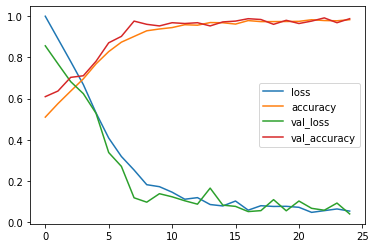

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 10ms/step - loss: 0.0403 - accuracy: 0.9863


[0.040311045944690704, 0.986328125]

In [ ]:
pred = model.predict(X_test)

32/32 [==============================] - 0s 8ms/step


In [ ]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.986328125


In [ ]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       159
           1       1.00      1.00      1.00         5
           2       1.00      0.99      0.99       522
           3       0.98      0.99      0.98       338

    accuracy                           0.99      1024
   macro avg       0.99      0.99      0.99      1024
weighted avg       0.99      0.99      0.99      1024



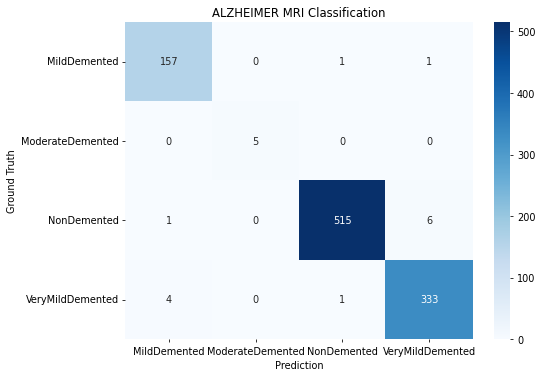

In [ ]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

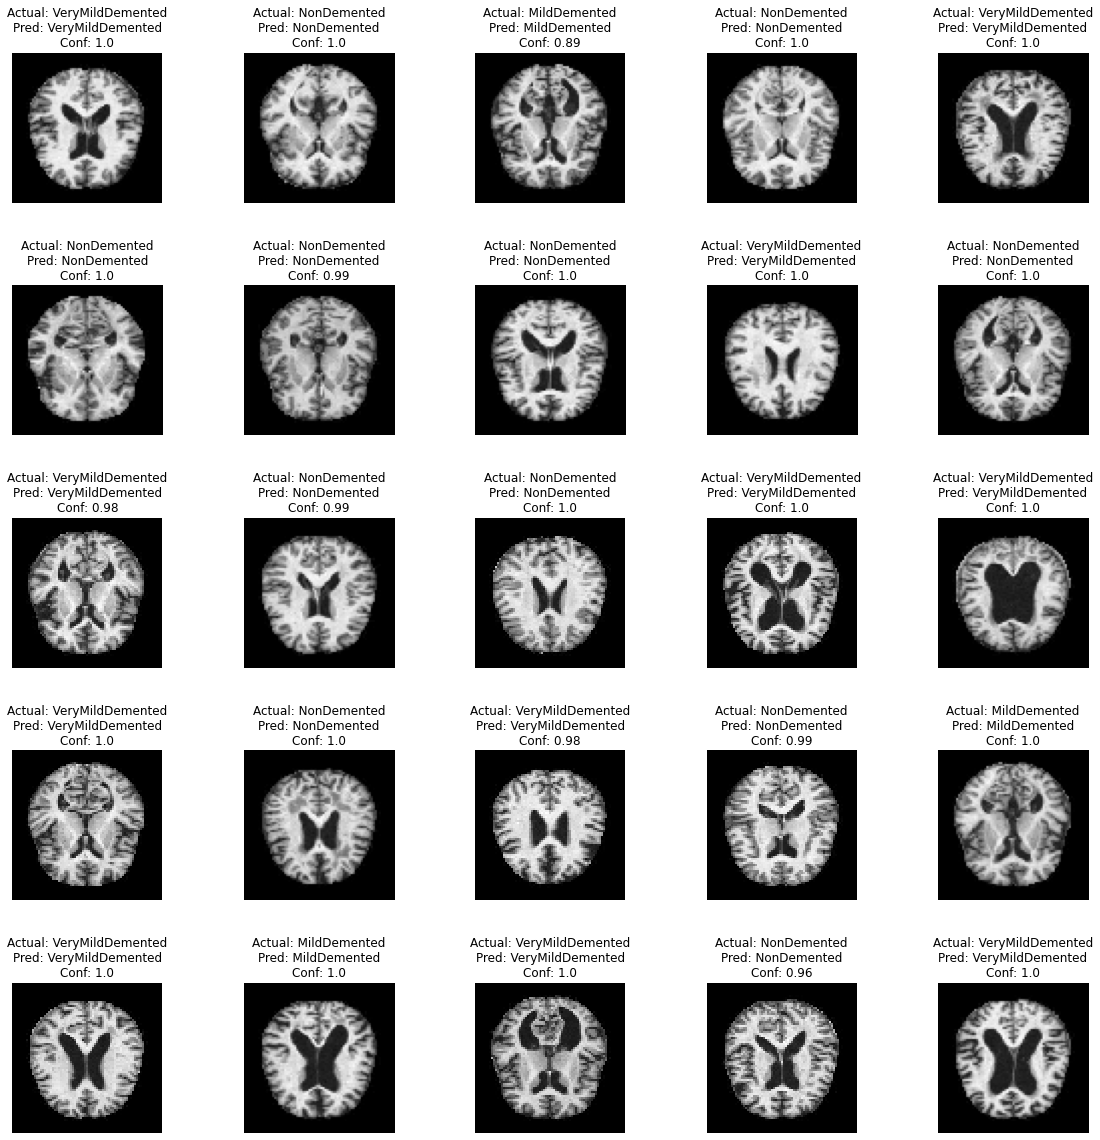

In [ ]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH PREPROCESSING [MEDIAN FILTER AND DATA AUGUMENTATION]**

In [ ]:
image_no1 = 1
for i in MildDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Median = img.filter(ImageFilter.MedianFilter(size = 3))
        name = '/content/drive/MyDrive/AD/Data_Median/MildDemented/Median_' + str(image_no1) + '.jpg'
        image_Median.save(name, 'PNG')
        image_no1 += 1

In [ ]:
image_no1 = 1
for i in ModerateDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Median = img.filter(ImageFilter.MedianFilter(size = 3))
        name = '/content/drive/MyDrive/AD/Data_Median/ModerateDemented/Median_' + str(image_no1) + '.jpg'
        image_Median.save(name, 'PNG')
        image_no1 += 1

In [ ]:
image_no1 = 1
for i in NonDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Median = img.filter(ImageFilter.MedianFilter(size = 3))
        name = '/content/drive/MyDrive/AD/Data_Median/NonDemented/Median_' + str(image_no1) + '.jpg'
        image_Median.save(name, 'PNG')
        image_no1 += 1

In [ ]:
image_no1 = 1
for i in VeryMildDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Median = img.filter(ImageFilter.MedianFilter(size = 3))
        name = '/content/drive/MyDrive/AD/Data_Median/VeryMildDemented/Median_' + str(image_no1) + '.jpg'
        image_Median.save(name, 'PNG')
        image_no1 += 1

In [ ]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

In [ ]:
MildDemented_Median=getListOfFiles('/content/drive/MyDrive/AD/Data_Median/MildDemented')
ModerateDemented_Median=getListOfFiles('/content/drive/MyDrive/AD/Data_Median/ModerateDemented')
NonDemented_Median=getListOfFiles('/content/drive/MyDrive/AD/Data_Median/NonDemented')
VeryMildDemented_Median=getListOfFiles('/content/drive/MyDrive/AD/Data_Median/VeryMildDemented')

In [ ]:
Imagedata = pd.DataFrame(index=np.arange(0, len(MildDemented_Median)+len(ModerateDemented_Median)+len(NonDemented_Median)+len(VeryMildDemented_Median)), columns=["image", "target"])
k=0
for c in [0,1,2,3]:
        if c==0:
            for m in range(len(MildDemented_Median)):
                Imagedata.iloc[k]["image"] = MildDemented_Median[m]
                Imagedata.iloc[k]["target"] = 0
                k += 1
        elif c==1:
            for m in range(len(ModerateDemented_Median)):
                Imagedata.iloc[k]["image"] = ModerateDemented_Median[m]
                Imagedata.iloc[k]["target"] = 1
                k += 1
        elif c==2:
             for m in range(len(NonDemented_Median)):
                Imagedata.iloc[k]["image"] = NonDemented_Median[m]
                Imagedata.iloc[k]["target"] = 2
                k += 1
        else:
          for m in range(len(VeryMildDemented_Median)):
            Imagedata.iloc[k]["image"]=VeryMildDemented_Median[m]
            Imagedata.iloc[k]["target"]=3
            k +=1

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=90,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

In [ ]:
train_image = []
y = []

for i in tqdm(range(Imagedata.shape[0])):
    img = image.load_img(Imagedata['image'].iloc[i], target_size=(75,75,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)


X = np.array(train_image)
y = Imagedata.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2 , shuffle=True)

Y_train = np_utils.to_categorical(y_train, 4)
Y_test = np_utils.to_categorical(y_test, 4)
Y_val = np_utils.to_categorical(y_val, 4)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

100%|██████████| 6400/6400 [45:13<00:00,  2.36it/s]


(5120, 75, 75, 3)
(1024, 75, 75, 3)
(256, 75, 75, 3)


In [ ]:
model = Sequential()

model.add(Conv2D(filters =32, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(datagen.flow(X_train, Y_train), batch_size=10, epochs = 25, validation_data=(X_val, Y_val))

NameError: ignored

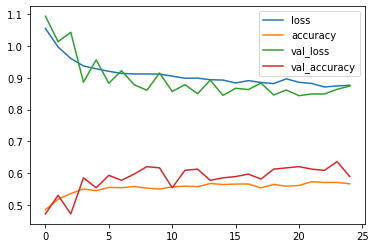

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 10ms/step - loss: 0.8596 - accuracy: 0.5684


[0.8595938682556152, 0.568359375]

In [ ]:
pred = model.predict(X_test)

32/32 [==============================] - 0s 7ms/step


In [ ]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.568359375


In [ ]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.78      0.04      0.08       159
           1       0.00      0.00      0.00         5
           2       0.80      0.58      0.67       522
           3       0.43      0.80      0.56       338

    accuracy                           0.57      1024
   macro avg       0.50      0.36      0.33      1024
weighted avg       0.67      0.57      0.54      1024



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


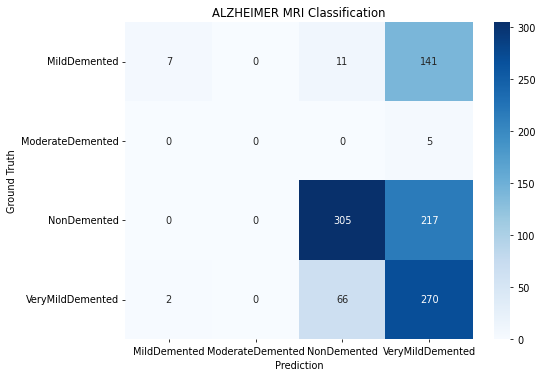

In [ ]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

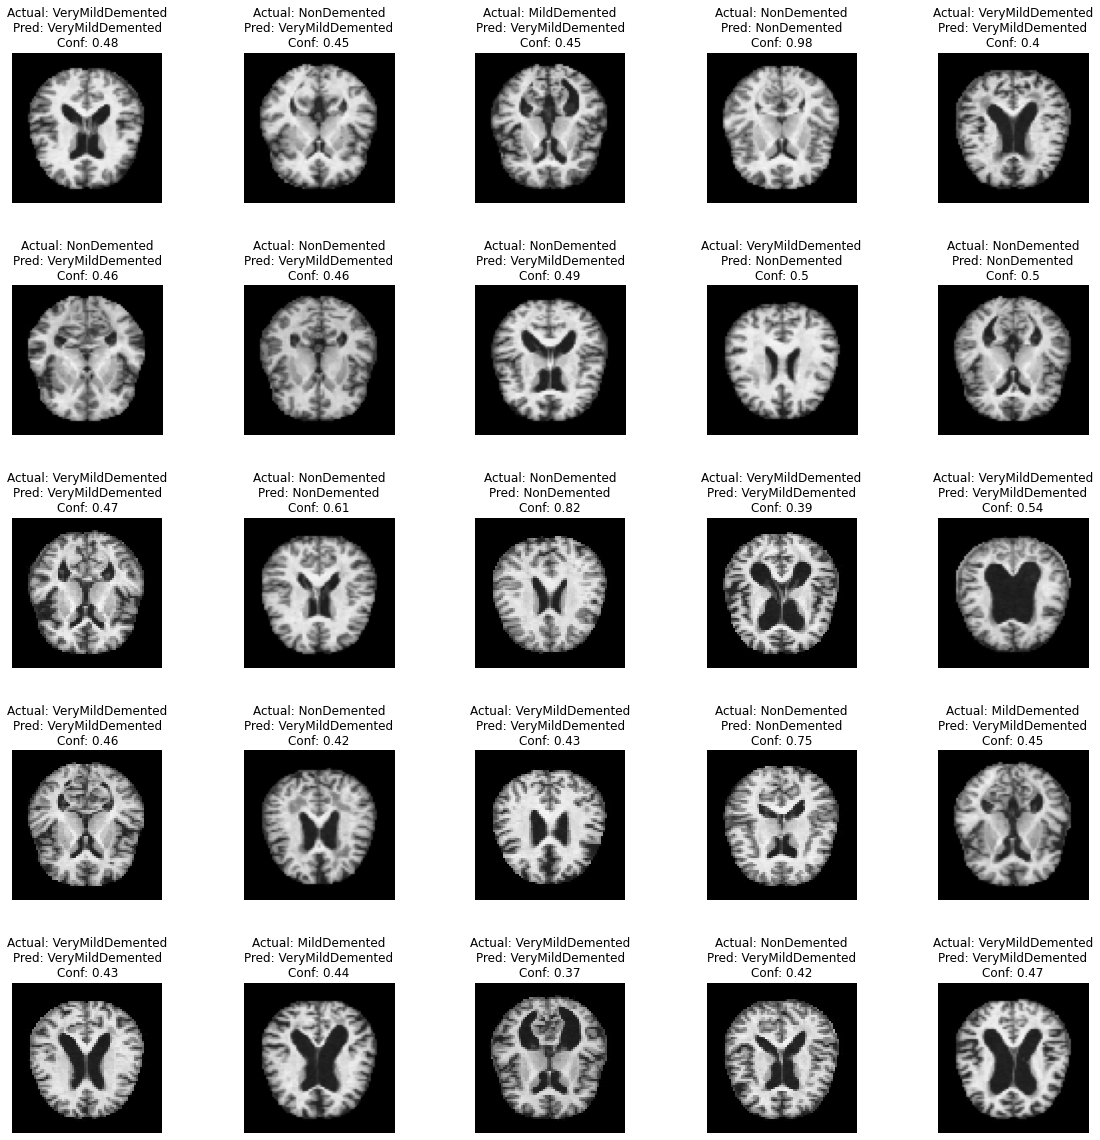

In [ ]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH PREPROCESSING [MEDIAN FILTER]**

In [ ]:
model = Sequential()

model.add(Conv2D(filters =32, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs = 25, validation_data=(X_val, Y_val))

Epoch 1/25
512/512 [==============================] - 13s 10ms/step - loss: 1.0354 - accuracy: 0.4990 - val_loss: 0.9552 - val_accuracy: 0.5430
Epoch 2/25
512/512 [==============================] - 4s 9ms/step - loss: 0.9059 - accuracy: 0.5727 - val_loss: 0.8297 - val_accuracy: 0.6172
Epoch 3/25
512/512 [==============================] - 4s 9ms/step - loss: 0.8341 - accuracy: 0.6062 - val_loss: 0.7135 - val_accuracy: 0.6992
Epoch 4/25
512/512 [==============================] - 4s 9ms/step - loss: 0.7325 - accuracy: 0.6617 - val_loss: 0.7241 - val_accuracy: 0.6797
Epoch 5/25
512/512 [==============================] - 4s 9ms/step - loss: 0.6392 - accuracy: 0.7137 - val_loss: 0.6006 - val_accuracy: 0.7500
Epoch 6/25
512/512 [==============================] - 4s 9ms/step - loss: 0.5062 - accuracy: 0.7818 - val_loss: 0.5060 - val_accuracy: 0.7656
Epoch 7/25
512/512 [==============================] - 4s 9ms/step - loss: 0.3916 - accuracy: 0.8363 - val_loss: 0.3140 - val_accuracy: 0.8828
Epoc

Text(0.5, 1.0, 'CNN WITH MEDIAN FILTER')

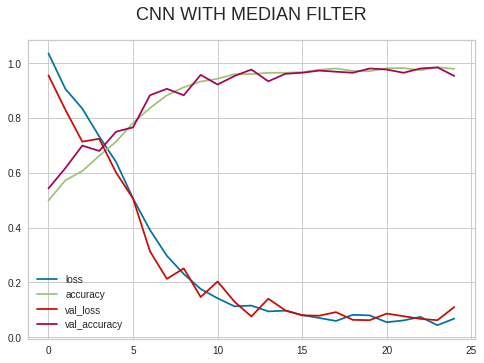

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.title("CNN WITH MEDIAN FILTER",fontsize=18,pad=20)

In [ ]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 1s 9ms/step - loss: 0.0943 - accuracy: 0.9648


[0.09433112293481827, 0.96484375]

In [ ]:
pred = model.predict(X_test)

32/32 [==============================] - 0s 7ms/step


In [ ]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.96484375


Text(0.5, 1.0, 'CNN WITH MEDIAN FILTER')

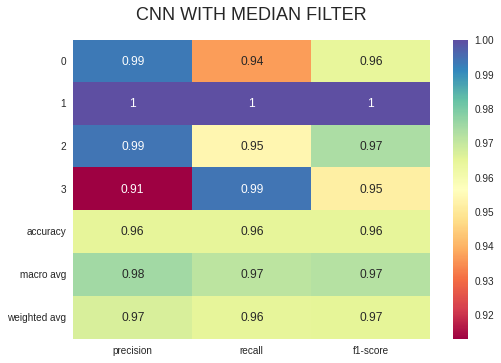

In [ ]:
import seaborn as sns
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
clf_report =classification_report(actual_label, preds,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap="Spectral")
plt.title("CNN WITH MEDIAN FILTER",fontsize=18,pad=20)

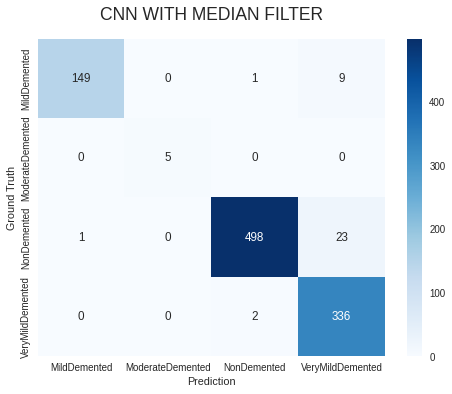

In [ ]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title("CNN WITH MEDIAN FILTER",fontsize=18,pad=20)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

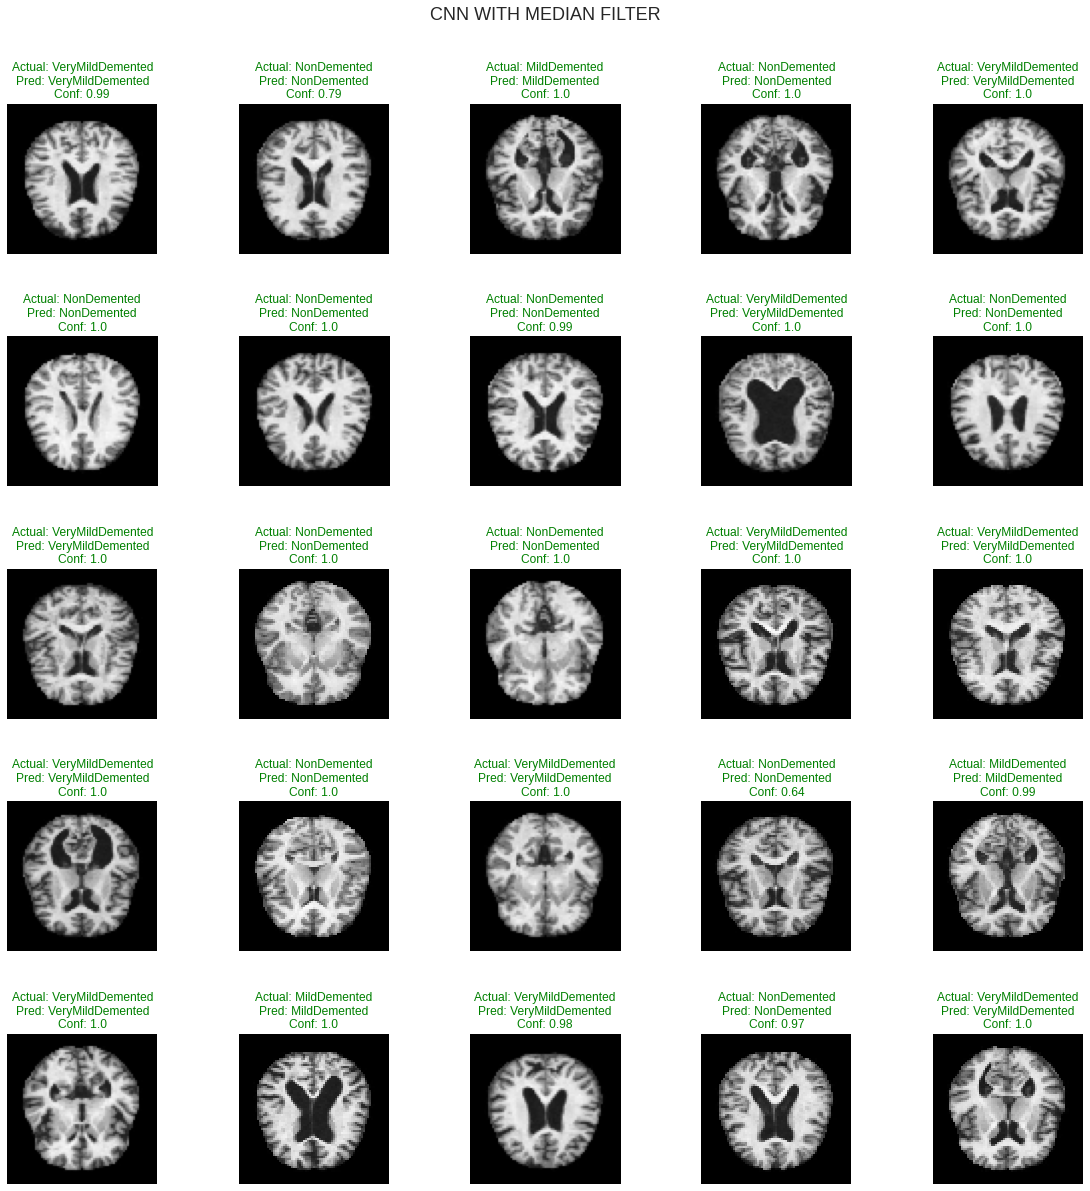

In [ ]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        if(labels[actual]==labels[predicted]):
           ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence),color='green')
        else:
          ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence),color='red')

        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1
f.suptitle("CNN WITH MEDIAN FILTER",fontsize=18,y=1.09)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH PREPROCESSING [GAUSSIAN FILTER AND DATA AUGUMENTATION]**

In [ ]:
image_no1 = 1
for i in MildDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Gaussian = img.filter(ImageFilter.GaussianBlur)
        name = '/content/drive/MyDrive/AD/Data_Gaussian/MildDemented/Gaussian_' + str(image_no1) + '.jpg'
        image_Gaussian.save(name, 'PNG')
        image_no1 += 1

In [ ]:
image_no1 = 1
for i in ModerateDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Gaussian = img.filter(ImageFilter.GaussianBlur)
        name = '/content/drive/MyDrive/AD/Data_Gaussian/ModerateDemented/Gaussian_' + str(image_no1) + '.jpg'
        image_Gaussian.save(name, 'PNG')
        image_no1 += 1

In [ ]:
image_no1 = 1
for i in NonDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Gaussian = img.filter(ImageFilter.GaussianBlur)
        name = '/content/drive/MyDrive/AD/Data_Gaussian/NonDemented/Gaussian_' + str(image_no1) + '.jpg'
        image_Gaussian.save(name, 'PNG')
        image_no1 += 1

In [ ]:
image_no1 = 1
for i in VeryMildDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Gaussian = img.filter(ImageFilter.GaussianBlur)
        name = '/content/drive/MyDrive/AD/Data_Gaussian/VeryMildDemented/Gaussian_' + str(image_no1) + '.jpg'
        image_Gaussian.save(name, 'PNG')
        image_no1 += 1

In [ ]:
MildDemented_Gaussian=getListOfFiles('/content/drive/MyDrive/AD/Data_Gaussian/MildDemented')
ModerateDemented_Gaussian=getListOfFiles('/content/drive/MyDrive/AD/Data_Gaussian/ModerateDemented')
NonDemented_Gaussian=getListOfFiles('/content/drive/MyDrive/AD/Data_Gaussian/NonDemented')
VeryMildDemented_Gaussian=getListOfFiles('/content/drive/MyDrive/AD/Data_Gaussian/VeryMildDemented')

In [ ]:
Imagedata = pd.DataFrame(index=np.arange(0, len(MildDemented_Gaussian)+len(ModerateDemented_Gaussian)+len(NonDemented_Gaussian)+len(VeryMildDemented_Gaussian)), columns=["image", "target"])
k=0
for c in [0,1,2,3]:
        if c==0:
            for m in range(len(MildDemented_Gaussian)):
                Imagedata.iloc[k]["image"] = MildDemented_Gaussian[m]
                Imagedata.iloc[k]["target"] = 0
                k += 1
        elif c==1:
            for m in range(len(ModerateDemented_Gaussian)):
                Imagedata.iloc[k]["image"] = ModerateDemented_Gaussian[m]
                Imagedata.iloc[k]["target"] = 1
                k += 1
        elif c==2:
             for m in range(len(NonDemented_Gaussian)):
                Imagedata.iloc[k]["image"] = NonDemented_Gaussian[m]
                Imagedata.iloc[k]["target"] = 2
                k += 1
        else:
          for m in range(len(VeryMildDemented_Gaussian)):
            Imagedata.iloc[k]["image"]=VeryMildDemented_Gaussian[m]
            Imagedata.iloc[k]["target"]=3
            k +=1

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=90,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

In [ ]:
train_image = []
y = []

for i in tqdm(range(Imagedata.shape[0])):
    img = image.load_img(Imagedata['image'].iloc[i], target_size=(75,75,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)


X = np.array(train_image)
y = Imagedata.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2 , shuffle=True)

Y_train = np_utils.to_categorical(y_train, 4)
Y_test = np_utils.to_categorical(y_test, 4)
Y_val = np_utils.to_categorical(y_val, 4)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

100%|██████████| 6400/6400 [00:11<00:00, 534.03it/s]


(5120, 75, 75, 3)
(1024, 75, 75, 3)
(256, 75, 75, 3)


In [ ]:
model = Sequential()

model.add(Conv2D(filters =32, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(datagen.flow(X_train, Y_train), batch_size=10, epochs = 25, validation_data=(X_val, Y_val))

Epoch 1/25
160/160 [==============================] - 10s 58ms/step - loss: 1.0607 - accuracy: 0.4797 - val_loss: 1.0755 - val_accuracy: 0.4727
Epoch 2/25
160/160 [==============================] - 9s 57ms/step - loss: 1.0108 - accuracy: 0.5090 - val_loss: 0.9444 - val_accuracy: 0.5820
Epoch 3/25
160/160 [==============================] - 9s 56ms/step - loss: 0.9733 - accuracy: 0.5258 - val_loss: 0.9072 - val_accuracy: 0.5625
Epoch 4/25
160/160 [==============================] - 9s 56ms/step - loss: 0.9539 - accuracy: 0.5391 - val_loss: 0.9633 - val_accuracy: 0.5508
Epoch 5/25
160/160 [==============================] - 9s 57ms/step - loss: 0.9441 - accuracy: 0.5383 - val_loss: 0.8935 - val_accuracy: 0.5625
Epoch 6/25
160/160 [==============================] - 9s 57ms/step - loss: 0.9402 - accuracy: 0.5428 - val_loss: 0.9773 - val_accuracy: 0.5508
Epoch 7/25
160/160 [==============================] - 9s 57ms/step - loss: 0.9366 - accuracy: 0.5439 - val_loss: 0.9022 - val_accuracy: 0.550

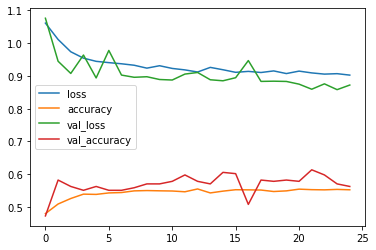

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 9ms/step - loss: 0.8539 - accuracy: 0.5840


[0.8538684844970703, 0.583984375]

In [ ]:
pred = model.predict(X_test)

32/32 [==============================] - 0s 7ms/step


In [ ]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.583984375


In [ ]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.63      0.11      0.18       159
           1       0.00      0.00      0.00         5
           2       0.74      0.69      0.72       522
           3       0.43      0.65      0.52       338

    accuracy                           0.58      1024
   macro avg       0.45      0.36      0.35      1024
weighted avg       0.62      0.58      0.56      1024



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


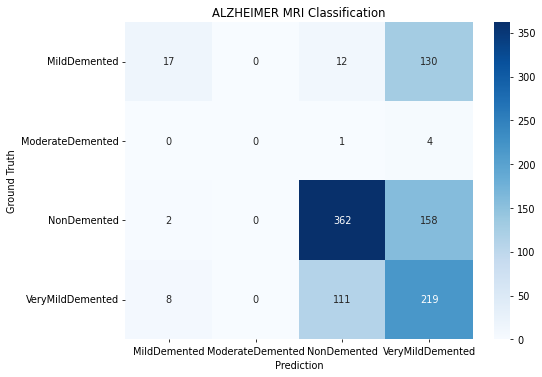

In [ ]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

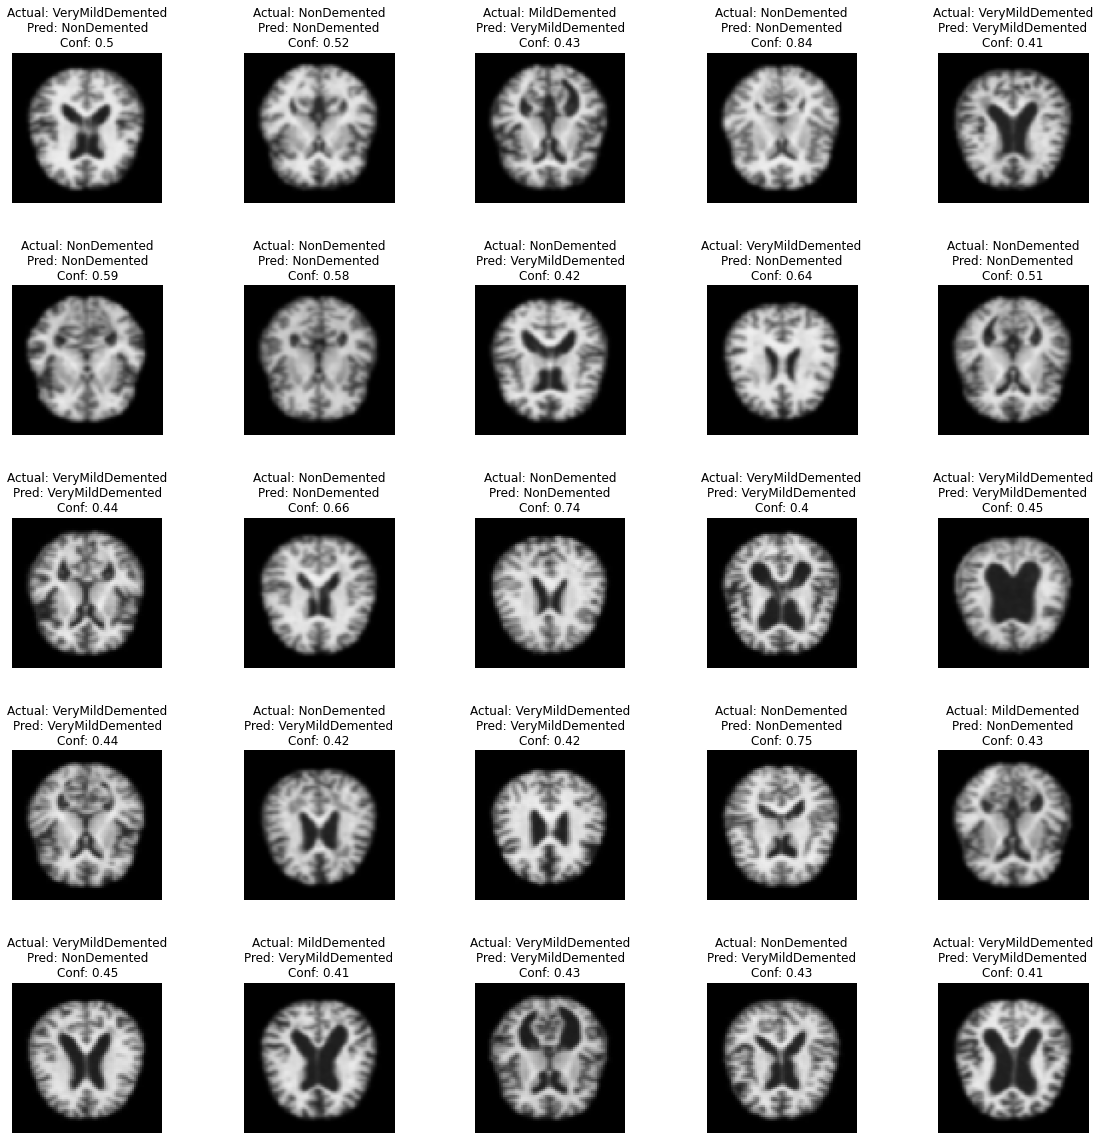

In [ ]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH PREPROCESSING [GAUSSIAN FILTER]**

In [ ]:
model = Sequential()

model.add(Conv2D(filters =32, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs = 25, validation_data=(X_val, Y_val))

Epoch 1/25
512/512 [==============================] - 6s 10ms/step - loss: 1.0520 - accuracy: 0.4902 - val_loss: 0.9739 - val_accuracy: 0.5586
Epoch 2/25
512/512 [==============================] - 4s 9ms/step - loss: 0.9677 - accuracy: 0.5430 - val_loss: 0.8906 - val_accuracy: 0.5977
Epoch 3/25
512/512 [==============================] - 4s 9ms/step - loss: 0.9090 - accuracy: 0.5705 - val_loss: 0.8480 - val_accuracy: 0.5938
Epoch 4/25
512/512 [==============================] - 4s 9ms/step - loss: 0.8749 - accuracy: 0.5854 - val_loss: 0.8007 - val_accuracy: 0.6641
Epoch 5/25
512/512 [==============================] - 5s 9ms/step - loss: 0.8236 - accuracy: 0.6059 - val_loss: 0.8290 - val_accuracy: 0.6523
Epoch 6/25
512/512 [==============================] - 5s 10ms/step - loss: 0.7641 - accuracy: 0.6484 - val_loss: 0.6787 - val_accuracy: 0.7109
Epoch 7/25
512/512 [==============================] - 4s 9ms/step - loss: 0.7017 - accuracy: 0.6805 - val_loss: 0.6079 - val_accuracy: 0.7500
Epoc

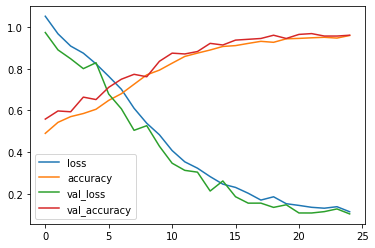

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 12ms/step - loss: 0.0925 - accuracy: 0.9697


[0.09246166795492172, 0.9697265625]

In [ ]:
pred = model.predict(X_test)

32/32 [==============================] - 0s 9ms/step


In [ ]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.9697265625


In [ ]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       1.00      1.00      1.00         5
           2       0.97      1.00      0.98       522
           3       0.98      0.94      0.96       338

    accuracy                           0.97      1024
   macro avg       0.98      0.97      0.97      1024
weighted avg       0.97      0.97      0.97      1024



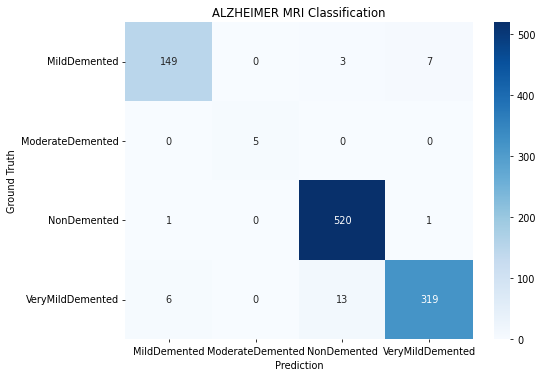

In [ ]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

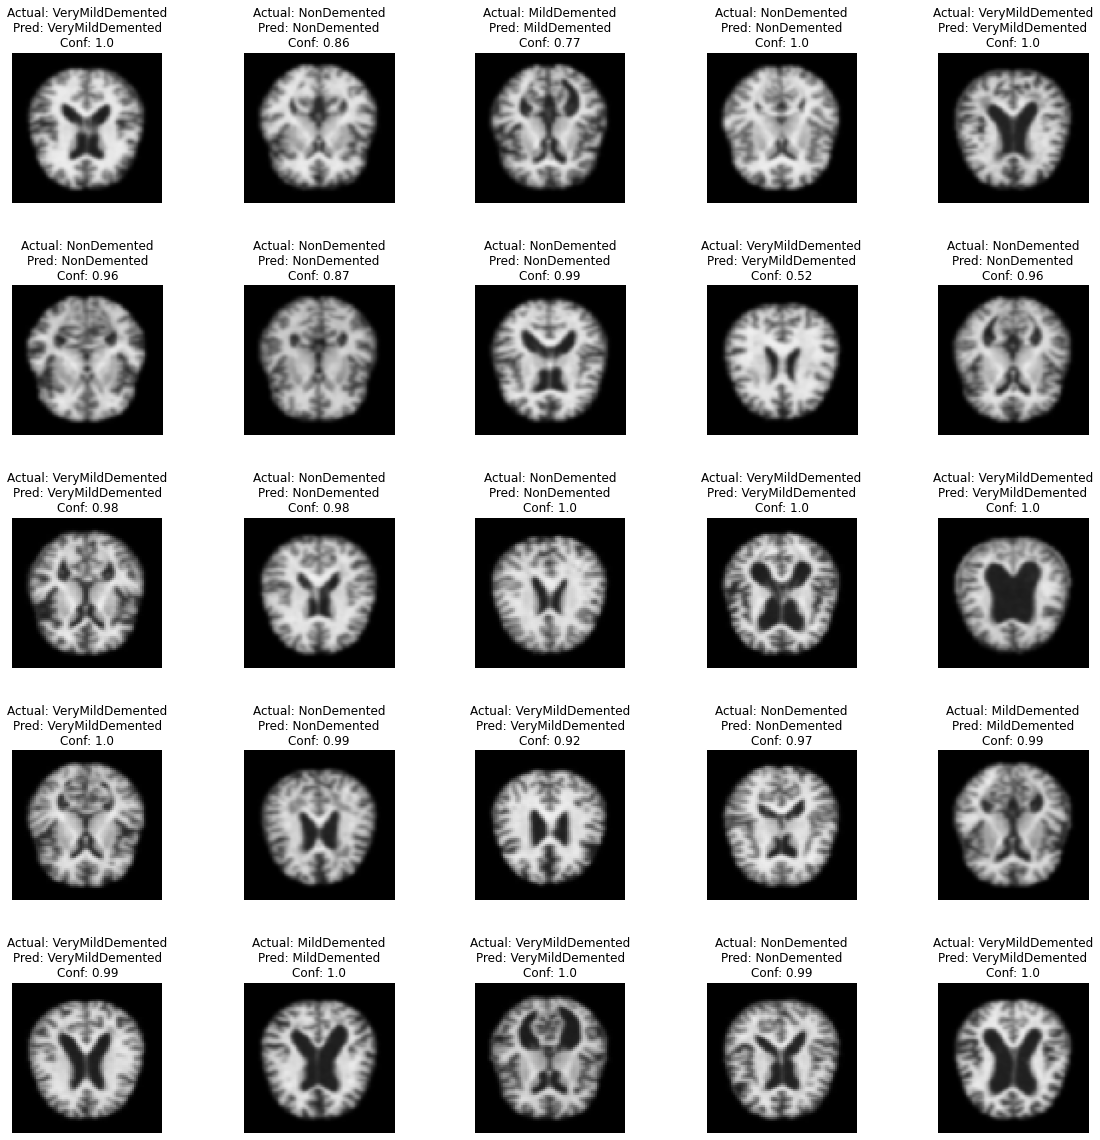

In [ ]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH DATA AUGUMENTATION**

In [ ]:
Imagedata = pd.DataFrame(index=np.arange(0, len(MildDemented)+len(ModerateDemented)+len(NonDemented)+len(VeryMildDemented)), columns=["image", "target"])
k=0
for c in [0,1,2,3]:
        if c==0:
            for m in range(len(MildDemented)):
                Imagedata.iloc[k]["image"] = MildDemented[m]
                Imagedata.iloc[k]["target"] = 0
                k += 1
        elif c==1:
            for m in range(len(ModerateDemented)):
                Imagedata.iloc[k]["image"] = ModerateDemented[m]
                Imagedata.iloc[k]["target"] = 1
                k += 1
        elif c==2:
             for m in range(len(NonDemented)):
                Imagedata.iloc[k]["image"] = NonDemented[m]
                Imagedata.iloc[k]["target"] = 2
                k += 1
        else:
          for m in range(len(VeryMildDemented)):
            Imagedata.iloc[k]["image"]=VeryMildDemented[m]
            Imagedata.iloc[k]["target"]=3
            k +=1


In [ ]:
train_image = []
y = []

for i in tqdm(range(Imagedata.shape[0])):
    img = image.load_img(Imagedata['image'].iloc[i], target_size=(75,75,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)


X = np.array(train_image)
y = Imagedata.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2 , shuffle=True)

Y_train = np_utils.to_categorical(y_train, 4)
Y_test = np_utils.to_categorical(y_test, 4)
Y_val = np_utils.to_categorical(y_val, 4)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

100%|██████████| 6400/6400 [00:10<00:00, 605.22it/s]


(5120, 75, 75, 3)
(1024, 75, 75, 3)
(256, 75, 75, 3)


In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=90,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

In [ ]:
model = Sequential()


"""'valid' (no padding): Output size will be smaller than input

    'same': Output size will be the same as input by adding padding"""
model.add(Conv2D(filters =32, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,3)))
model.add(MaxPool2D(pool_size=(1,1)))


"""Padding helps:
Preserve information at edges
Prevent rapid dimension reduction
Give equal importance to border pixels

Pooling helps:
Reduce model complexity
Prevent overfitting 
Create position invariance
Extract dominant features"""

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))# Intentionally reduce dimensions

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))# Intentionally reduce dimensions
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # Intentionally reduce dimensions
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(datagen.flow(X_train, Y_train), batch_size=10, epochs = 25, validation_data=(X_val, Y_val))

Epoch 1/25
160/160 [==============================] - 11s 63ms/step - loss: 1.0497 - accuracy: 0.4844 - val_loss: 1.0380 - val_accuracy: 0.4727
Epoch 2/25
160/160 [==============================] - 9s 56ms/step - loss: 1.0147 - accuracy: 0.4977 - val_loss: 1.0546 - val_accuracy: 0.4180
Epoch 3/25
160/160 [==============================] - 9s 56ms/step - loss: 0.9527 - accuracy: 0.5316 - val_loss: 0.9271 - val_accuracy: 0.5664
Epoch 4/25
160/160 [==============================] - 9s 56ms/step - loss: 0.9550 - accuracy: 0.5377 - val_loss: 0.9584 - val_accuracy: 0.5195
Epoch 5/25
160/160 [==============================] - 9s 57ms/step - loss: 0.9340 - accuracy: 0.5457 - val_loss: 0.9062 - val_accuracy: 0.5664
Epoch 6/25
160/160 [==============================] - 9s 57ms/step - loss: 0.9237 - accuracy: 0.5508 - val_loss: 0.9208 - val_accuracy: 0.5977
Epoch 7/25
160/160 [==============================] - 9s 57ms/step - loss: 0.9316 - accuracy: 0.5469 - val_loss: 0.9006 - val_accuracy: 0.593

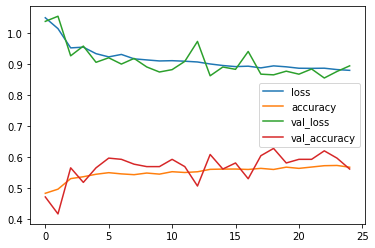

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 10ms/step - loss: 0.8744 - accuracy: 0.5635


[0.8743547201156616, 0.5634765625]

In [ ]:
pred = model.predict(X_test)

32/32 [==============================] - 0s 8ms/step


In [ ]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.5634765625


In [ ]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.40      0.30      0.34       159
           1       0.00      0.00      0.00         5
           2       0.80      0.59      0.68       522
           3       0.43      0.66      0.52       338

    accuracy                           0.56      1024
   macro avg       0.41      0.39      0.38      1024
weighted avg       0.61      0.56      0.57      1024



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


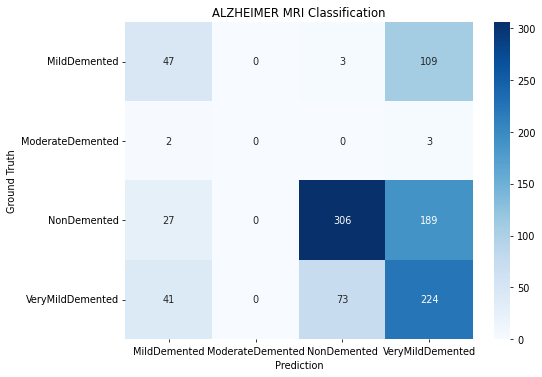

In [ ]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

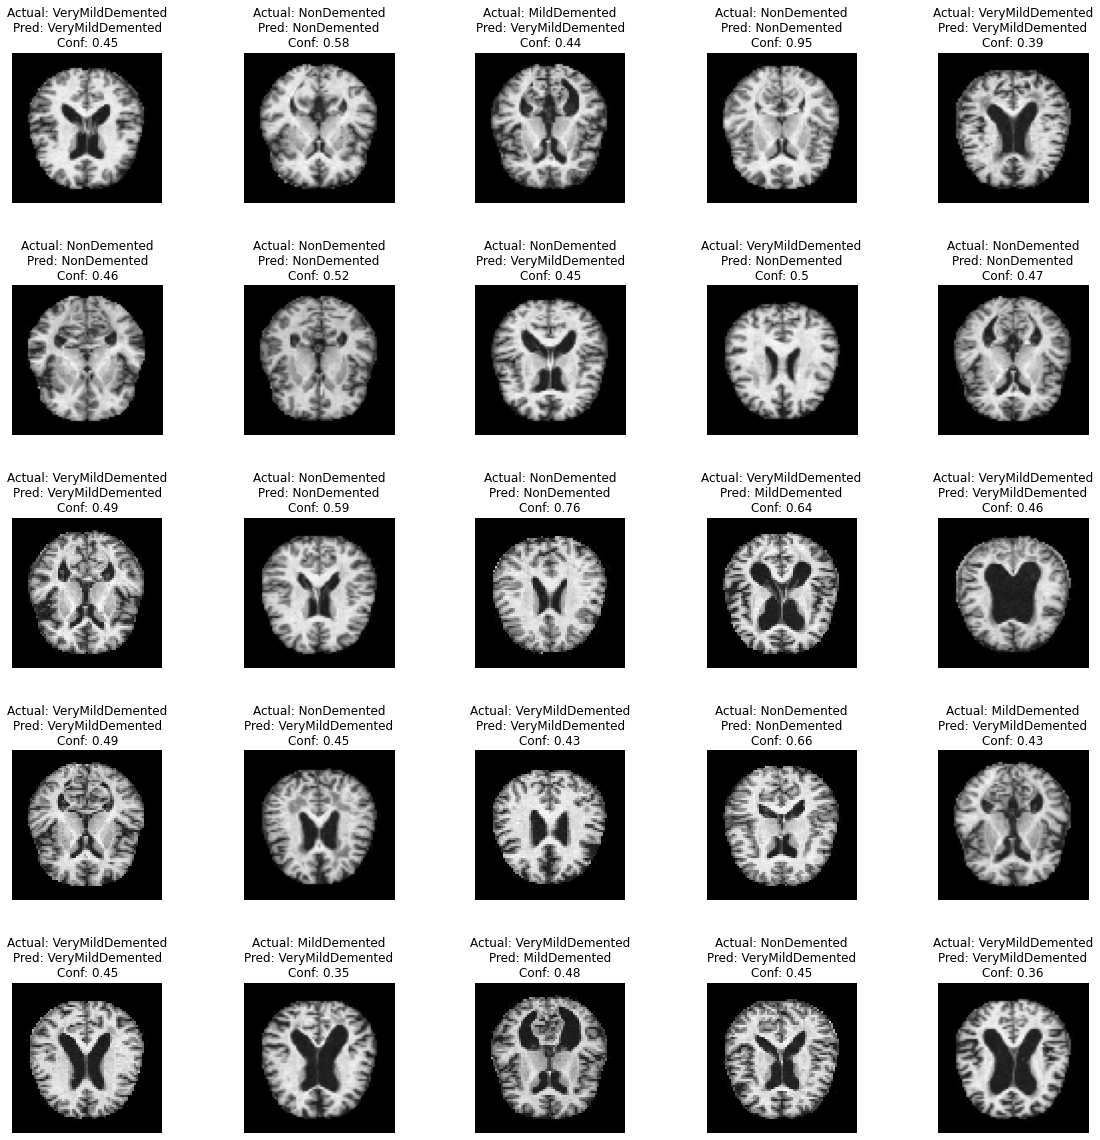

In [ ]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)